In [ ]:
#Installations
!pip install ultralytics
!pip install Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 10.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Imports
import ultralytics
from ultralytics import YOLO
import os
import PIL
import matplotlib.pyplot as plt
import numpy as np
import yaml
import shutil
from tqdm import tqdm

In [ ]:
#Define paths
path_to_data= "/content/drive/MyDrive/colab/data/"
path_to_images= "/content/drive/MyDrive/colab/data/e-flite/Images/"
path_to_labels = "/content/drive/MyDrive/colab/data/e-flite/Annotations/"
path_to_config= "/content/drive/MyDrive/colab/e-flite.yaml"
output_path = "/content/drive/MyDrive/colab/yolo_data_eflite/output/"

In [ ]:
#Note: can clean this up and run a loop instead of doing it in 3 blocks of code
def split_data(path_to_images,path_to_labels,path_to_save_images,path_to_save_labels):

  file_names_imgs = os.listdir(path_to_images)
  num_of_images = len(file_names_imgs)
  num_train = int(0.60*num_of_images)
  num_val = int(0.20*num_of_images)
  num_test = int(0.20*num_of_images)

  for i in tqdm(range(num_train)):
    try:
      source_images = path_to_images+file_names_imgs[i]
#       os.makedirs(path_to_save_iamges+"train/", exist_ok=True)
      destination_images = path_to_save_images+"train/"+file_names_imgs[i]

      name_txt = file_names_imgs[i].split(".")[0]
      source_labels = path_to_labels+name_txt+".txt"
#       os.makedirs(path_to_save_labels+"train/", exist_ok=True)
      destination_labels = path_to_save_labels+"train/"+name_txt+".txt"

      shutil.copyfile(source_images, destination_images)
      shutil.copyfile(source_labels, destination_labels)
    except Exception as e:
      print(e)
      print(f"source_images: {source_images} \n destination_images: {destination_images}")
      print(f"source_labels: {source_labels} \n destination_labels: {destination_labels}")

  range_1=num_train+num_val
  for i in tqdm(range(num_train,range_1)):
    try:
      source_images = path_to_images+file_names_imgs[i]
#       os.makedirs(path_to_save_iamges+"val/", exist_ok=True)
      destination_images = path_to_save_images+"val/"+file_names_imgs[i]

      name_txt = file_names_imgs[i].split(".")[0]

      source_labels = path_to_labels+name_txt+".txt"
#       os.makedirs(path_to_save_labels+"val/", exist_ok=True)
      destination_labels = path_to_save_labels+"val/"+name_txt+".txt"

      shutil.copyfile(source_images, destination_images)
      shutil.copyfile(source_labels, destination_labels)

    except Exception as e:
      print(e)
      print(f"source_images: {source_images} \n destination_images: {destination_images}")
      print(f"source_labels: {source_labels} \n destination_labels: {destination_labels}")

  range_2=range_1+num_test
  for i in tqdm(range(range_1,range_2)):
    try:
      source_images = path_to_images+file_names_imgs[i]
#       os.makedirs(path_to_save_iamges+"test/", exist_ok=True)
      destination_images = path_to_save_images+"test/"+file_names_imgs[i]

      name_txt = file_names_imgs[i].split(".")[0]

      source_labels = path_to_labels+name_txt+".txt"
#       os.makedirs(path_to_save_labels+"test/", exist_ok=True)
      destination_labels = path_to_save_labels+"test/"+name_txt+".txt"

      shutil.copyfile(source_images, destination_images)
      shutil.copyfile(source_labels, destination_labels)

    except Exception as e:
      print(e)
      print(f"source_images: {source_images} \n destination_images: {destination_images}")
      print(f"source_labels: {source_labels} \n destination_labels: {destination_labels}")

In [ ]:
path_to_save_images = "/content/drive/MyDrive/colab/yolo_data_eflite/images/"
path_to_save_labels = "/content/drive/MyDrive/colab/yolo_data_eflite/labels/"

split_data(path_to_images,path_to_labels,path_to_save_images,path_to_save_labels)

100%|██████████| 80/80 [00:59<00:00,  1.35it/s]


In [ ]:
#Load YOLO V8 model
model = YOLO("yolov8n.yaml")


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
#Train model
results = model.train(data = path_to_config, epochs=70, batch=10, plots=True)

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/colab/e-flite.yaml, epochs=60, patience=50, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

In [ ]:
#Load the best model after training
model_test = YOLO("/content/runs/detect/train/weights/best.pt")

In [ ]:
res = model_test.predict("/content/drive/MyDrive/colab/yolo_data_eflite/images/test/", conf=0.2)


image 1/80 /content/drive/MyDrive/colab/yolo_data_eflite/images/test/268.jpg: 384x640 1 e-flite, 98.2ms
image 2/80 /content/drive/MyDrive/colab/yolo_data_eflite/images/test/269.jpg: 384x640 1 e-flite, 95.7ms
image 3/80 /content/drive/MyDrive/colab/yolo_data_eflite/images/test/270.jpg: 384x640 1 e-flite, 90.7ms
image 4/80 /content/drive/MyDrive/colab/yolo_data_eflite/images/test/271.jpg: 384x640 2 e-flites, 93.0ms
image 5/80 /content/drive/MyDrive/colab/yolo_data_eflite/images/test/272.jpg: 384x640 1 e-flite, 88.6ms
image 6/80 /content/drive/MyDrive/colab/yolo_data_eflite/images/test/273.jpg: 384x640 (no detections), 95.5ms
image 7/80 /content/drive/MyDrive/colab/yolo_data_eflite/images/test/274.jpg: 384x640 (no detections), 91.9ms
image 8/80 /content/drive/MyDrive/colab/yolo_data_eflite/images/test/275.jpg: 384x640 (no detections), 105.6ms
image 9/80 /content/drive/MyDrive/colab/yolo_data_eflite/images/test/278.jpg: 384x640 3 e-flites, 95.3ms
image 10/80 /content/drive/MyDrive/colab/y

In [ ]:
def plot_results(results,k=5):
  for i in range(k):
    rand_int = np.random.randint(0,len(results))

    res=results[rand_int]

    original_img=res.orig_img
    original_img=PIL.Image.fromarray(original_img)

    pred = res.plot(line_width=1)
    pred = pred[:,:,::-1] #convert BGR to RGB
    pred_img = PIL.Image.fromarray(pred)

    label=res[0].names[0]

    fig = plt.figure(figsize=(12,8))
    ax = plt.subplot(1,2,1)
    ax.set_title("Original Image")
    ax.imshow(original_img)

    ax = plt.subplot(1,2,2)
    ax.set_title(f"prediction with label {label}")
    ax.imshow(pred_img)

    plt.show()

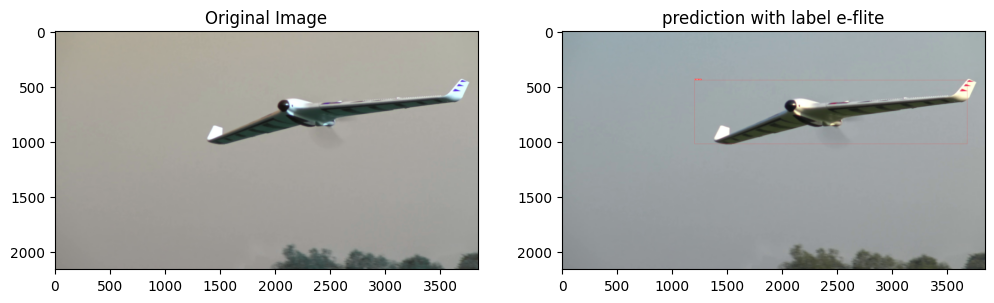

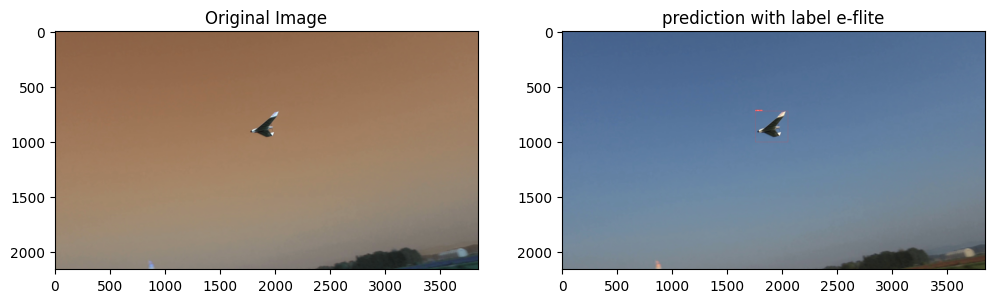

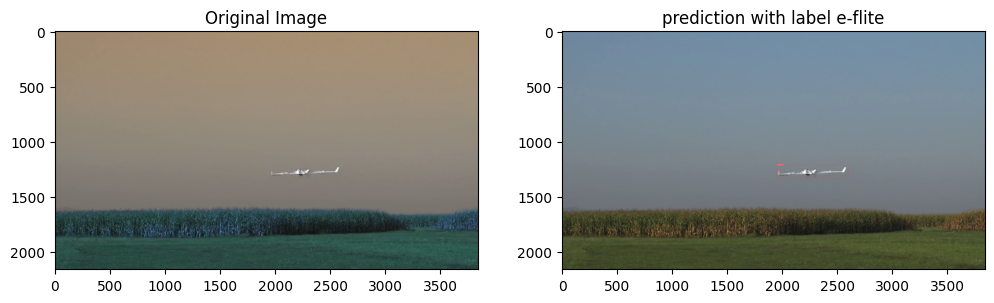

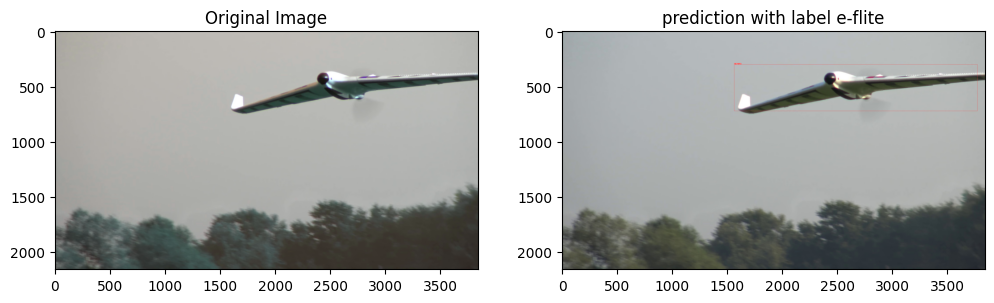

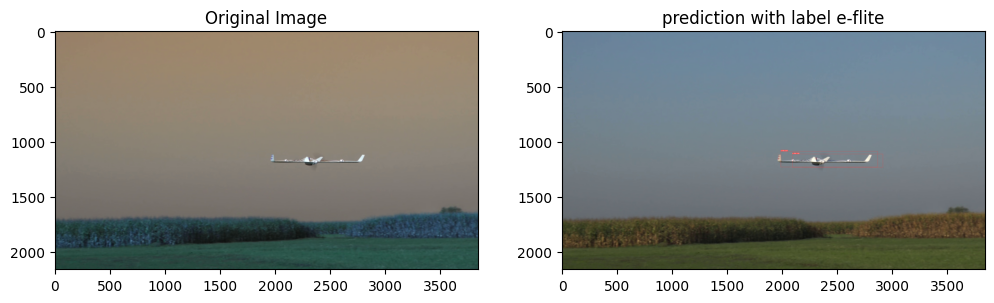

In [ ]:
plot_results(res)